In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

filename = "cleaned_dataset.csv"

df = pd.read_csv(filename)

print(df[['is_clean','size', 'loves_count', 'number_of_reviews', 'rating', 'list_price']])

      is_clean  size  loves_count  number_of_reviews  rating  list_price
0            1  0.15        22871                397  4.3401        20.0
1            1  1.00         6596                240  4.6792        32.0
2            1  0.30         5015                232  4.4310        19.0
3            1  0.29         4978                103  4.6117        22.0
4            1  0.14         3685                 19  4.0526        22.0
...        ...   ...          ...                ...     ...         ...
1189         0  0.30        30837               3024  4.2004        32.0
1190         0  0.10        23332               1964  4.5229        48.0
1191         0  0.50        14056                335  4.1910        29.0
1192         0  1.35        12600                261  4.4904        39.0
1193         0  0.80         7764                198  4.4949        39.0

[1194 rows x 6 columns]


Sample of training data (X_train):
     size  loves_count  number_of_reviews  rating  list_price
562  1.00         2031                797  4.2058        34.0
999  1.00       121421               3592  4.2511        42.0
241  3.00        26172                134  4.3358        28.0
640  0.24        49198                507  4.2702        20.0
472  0.03        12516                449  3.4232        21.0

Sample of testing data (X_test):
      size  loves_count  number_of_reviews  rating  list_price
135  0.012        24171                220  3.9909        36.0
965  0.002        34578                242  4.1860        22.0
827  0.230        56904               1736  4.1532        18.0
701  0.160        34208                123  4.1382        34.0
178  0.080        94789                448  3.8237        35.0
Accuracy: 0.8451882845188284
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       203
           1       0

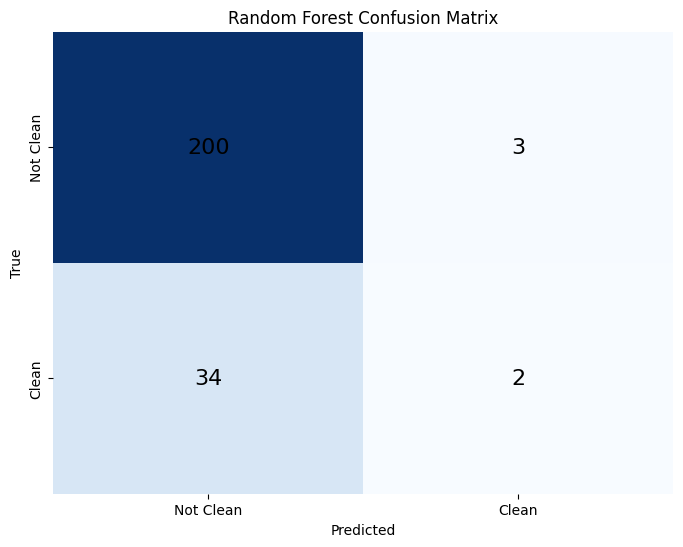

In [14]:
# numeric features for SVM classification
features = ['size', 'loves_count', 'number_of_reviews', 'rating', 'list_price']
X = df[features]
y = df['is_clean']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

# sample of the training and test data
print("Sample of training data (X_train):")
print(X_train.head())  #
print("\nSample of testing data (X_test):")
print(X_test.head())  

# initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=33)

rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)



accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm, annot=False, cmap='Blues', xticklabels=['Not Clean', 'Clean'], yticklabels=['Not Clean', 'Clean'], cbar=False)
for i in range(2):
    for j in range(2):
        ax.text(j + 0.5, i + 0.5, f'{cm[i, j]}', ha='center', va='center', fontsize=16, color='black')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest Confusion Matrix')
plt.show()
